In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
white = pd.read_csv('white_cleaned_final.csv')
red = pd.read_csv('red_cleaned_final.csv')

In [3]:
red = red.drop(['Unnamed: 0'], axis = 1)

In [4]:
red

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,citric_acid,alcohol,quality
0,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,0.00,9.4,5
1,7.8,0.880,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,0.00,9.8,5
2,7.8,0.760,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,0.04,9.8,5
3,11.2,0.280,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,0.56,9.8,6
4,7.4,0.660,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,0.00,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1265,6.8,0.620,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,0.08,9.5,6
1266,6.2,0.600,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,0.08,10.5,5
1267,5.9,0.550,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,0.10,11.2,6
1268,5.9,0.645,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,0.12,10.2,5


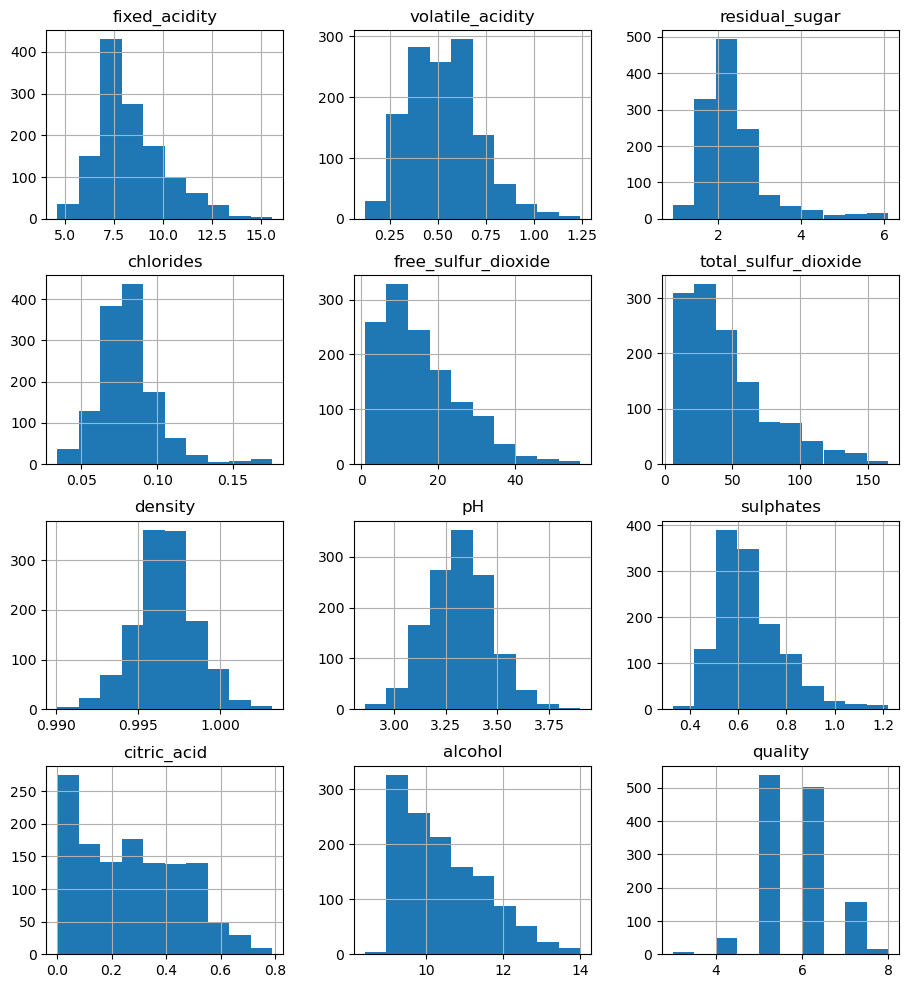

In [5]:
hist_red = red.hist(figsize=(11,12))

### x,y split

In [6]:
X = red.drop('quality', axis=1)
y = red.quality

### Train-Test split

In [7]:
RAND_STATE = 100 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,citric_acid,alcohol
976,7.8,0.815,2.6,0.074,48.0,90.0,0.99621,3.38,0.62,0.01,10.8
1249,7.5,0.520,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,0.40,11.8
46,7.7,0.620,3.8,0.084,25.0,45.0,0.99780,3.34,0.53,0.04,9.5


### Scale and Transform

In [9]:
#Standanrd Scaler to use on columns: pH, density, (quality - is y)
#what i did: used ss and pt on data set of X train, then took out the 6 + 7 col from SS and replaced it into the pt df. 
#columns 6 + 7
ss = StandardScaler()

X_train_scaled=ss.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)

#transforming the x - train data using the standard scaler
#train_transformed=ss.fit_transform(X_train)

In [10]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,-0.300045,1.642387,0.289368,-0.350058,3.250410,1.433361,-0.237069,0.444053,-0.204462,-1.350775,0.318972
1,-0.470522,-0.021476,-0.214423,-1.053794,-0.359039,-0.809318,-1.034167,-0.363922,-0.058288,0.671538,1.249765
2,-0.356871,0.542545,1.800739,0.152610,0.944373,-0.008361,0.625099,0.174728,-0.862242,-1.195213,-0.891059
3,0.495515,-0.359889,0.289368,0.504478,0.242536,1.016864,1.395085,-1.104565,-1.008415,-0.209983,-0.984138
4,2.541243,0.514344,4.319692,0.102343,-0.860351,-0.104476,3.010972,-1.643214,0.599492,2.019747,-0.425662
...,...,...,...,...,...,...,...,...,...,...,...
884,-0.186394,0.316937,-0.466318,1.962216,-1.261401,-1.225815,-1.142616,-0.633246,-0.496809,-0.572962,0.691289
885,-0.470522,-0.021476,-0.592266,0.202877,-0.359039,-0.328744,0.082855,0.444053,-0.204462,-0.572962,-0.891059
886,4.132364,0.909159,1.674792,0.956879,-0.960614,-0.072437,3.553216,-2.451188,0.234058,2.538289,0.691289
887,-0.868303,1.416778,0.793158,1.057413,-0.760089,-0.713203,-0.079818,0.915371,-0.642982,-1.402629,0.225893


In [11]:
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_train_transformed =pd.DataFrame(X_train_transformed)


In [12]:
#pt = PowerTransformer()
#acidity = red.fixed_acidity
#acidity_test = pt.fit_transform(acidity).to_numpy().reshape(-1,1)
#acidity_test =pd.DataFrame(acidity_test)
#red_col_fixed_ac = pd.DataFrame(red_col_fixed_ac)
#red_col_fixed_ac =pd.DataFrame(X_train_transformed)

In [13]:
X_train_transformed[6] = X_train_scaled[6]

In [14]:
X_train_transformed[7]= X_train_scaled[7]

In [15]:
X_train_transformed

,0,1,2,3,4,5,6,7,8,9,10
0,-0.171108,1.532116,0.644498,-0.259667,2.156996,1.334259,-0.237069,0.444053,-0.034549,-1.458802,0.540050
1,-0.373911,0.076375,0.027364,-1.205047,-0.130326,-0.840992,-1.034167,-0.363922,0.134460,0.725316,1.256374
2,-0.237370,0.620289,1.677730,0.306365,1.026776,0.303805,0.625099,0.174728,-0.937600,-1.256574,-0.961858
3,0.637484,-0.280198,0.644498,0.656507,0.493257,1.098564,1.395085,-1.104565,-1.175525,-0.121991,-1.116999
4,2.047002,0.594459,2.362246,0.253390,-0.894472,0.203698,3.010972,-1.643214,0.783085,1.804242,-0.282828
...,...,...,...,...,...,...,...,...,...,...,...
884,-0.042397,0.409761,-0.374677,1.785561,-1.923265,-2.194028,-1.142616,-0.633246,-0.404953,-0.513463,0.860492
885,-0.373911,0.076375,-0.606628,0.358579,-0.130326,-0.058551,0.082855,0.444053,-0.034549,-0.513463,-0.961858
886,2.768638,0.944159,1.619879,1.057887,-1.098232,0.237787,3.553216,-2.451188,0.443773,2.165553,0.860492
887,-0.898842,1.359026,1.090177,1.140283,-0.712476,-0.648968,-0.079818,0.915371,-0.608019,-1.527844,0.451551


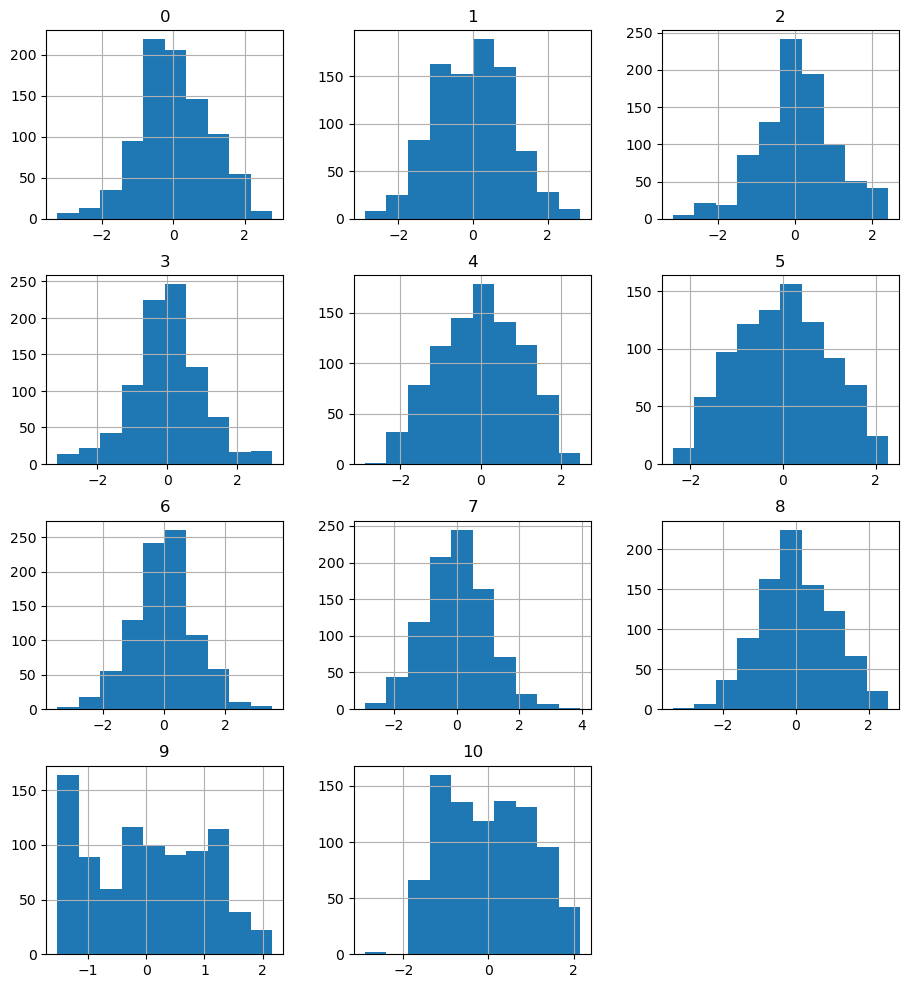

In [16]:
#x train transformed data 
hist_x_train_trans = X_train_transformed.hist(figsize=(11,12))

In [34]:
#renaming columns after transformation: 
#function to rename the column names 
def rename_columns(x):
    x.rename(columns={0:'fixed_acidity',1:'volatile_acidity', 2:"citric_acid", 
                          3:'residual_sugar', 4: 'chlorides', 5:"free_sulfur_dioxide",
                      6:"total_sulfur_dioxide",7:'density', 8:'ph', 9:'sulphates', 10:'alcohol'}, inplace=True )
    return x

In [35]:
rename_columns(X_train_transformed)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,-0.171108,1.532116,0.644498,-0.259667,2.156996,1.334259,-0.237069,0.444053,-0.034549,-1.458802,0.540050
1,-0.373911,0.076375,0.027364,-1.205047,-0.130326,-0.840992,-1.034167,-0.363922,0.134460,0.725316,1.256374
2,-0.237370,0.620289,1.677730,0.306365,1.026776,0.303805,0.625099,0.174728,-0.937600,-1.256574,-0.961858
3,0.637484,-0.280198,0.644498,0.656507,0.493257,1.098564,1.395085,-1.104565,-1.175525,-0.121991,-1.116999
4,2.047002,0.594459,2.362246,0.253390,-0.894472,0.203698,3.010972,-1.643214,0.783085,1.804242,-0.282828
...,...,...,...,...,...,...,...,...,...,...,...
884,-0.042397,0.409761,-0.374677,1.785561,-1.923265,-2.194028,-1.142616,-0.633246,-0.404953,-0.513463,0.860492
885,-0.373911,0.076375,-0.606628,0.358579,-0.130326,-0.058551,0.082855,0.444053,-0.034549,-0.513463,-0.961858
886,2.768638,0.944159,1.619879,1.057887,-1.098232,0.237787,3.553216,-2.451188,0.443773,2.165553,0.860492
887,-0.898842,1.359026,1.090177,1.140283,-0.712476,-0.648968,-0.079818,0.915371,-0.608019,-1.527844,0.451551


In [36]:
X_train_transformed.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],
      dtype='object')